# Kualitas Air Sumur 2022

### Import Library

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset

In [55]:
file_path = 'dataset.csv'
data = pd.read_csv(file_path)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11814 entries, 0 to 11813
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   periode_data     11814 non-null  int64 
 1   tahun            11814 non-null  int64 
 2   periode          11814 non-null  int64 
 3   waktu_sampling   11814 non-null  object
 4   nama_lokasi      11814 non-null  object
 5   kecamatan        11814 non-null  object
 6   lintang_selatan  11814 non-null  object
 7   bujur_timur      11814 non-null  object
 8   parameter        11814 non-null  object
 9   satuan           11814 non-null  object
 10  baku_mutu        11814 non-null  object
 11  nilai            11814 non-null  object
dtypes: int64(3), object(9)
memory usage: 1.1+ MB


In [57]:
print(data.head());

   periode_data  tahun  periode      waktu_sampling nama_lokasi kecamatan  \
0          2022   2022        1  Maret - April 2022      Cideng    Gambir   
1          2022   2022        1  Maret - April 2022      Cideng    Gambir   
2          2022   2022        1  Maret - April 2022      Cideng    Gambir   
3          2022   2022        1  Maret - April 2022      Cideng    Gambir   
4          2022   2022        1  Maret - April 2022      Cideng    Gambir   

  lintang_selatan  bujur_timur        parameter satuan baku_mutu nilai  
0    -6,166808333  106,8093056            Warna    TCU        50    11  
1    -6,166808333  106,8093056          Besi Fe   mg L         1  0,09  
2    -6,166808333  106,8093056      Fluorida F-   mg L       1,5  0,49  
3    -6,166808333  106,8093056  Kesadahan CaCO3   mg L       500  89,5  
4    -6,166808333  106,8093056        Mangan Mn   mg L       0,5  0,03  


### Preprocessing Data

In [7]:
# Filter hanya parameter 'Besi Fe' dan buat salinannya
data_besi = data[data['parameter'] == 'Besi Fe'].copy()

### Konversi kolom 'nilai' dan 'baku_mutu' menjadi numerik, mengganti koma dengan titik

In [9]:
data_besi['nilai'] = data_besi['nilai'].str.replace(',', '.').astype(float)
data_besi['baku_mutu'] = data_besi['baku_mutu'].str.replace(',', '.').astype(float)

### Membuat variabel target: klasifikasi "Di Atas Standar" atau "Dalam Standar"

In [11]:
data_besi['status'] = np.where(data_besi['nilai'] > data_besi['baku_mutu'], 'Di Atas Standar', 'Dalam Standar')

### Encoding variabel kategori (lokasi dan variabel target)

In [13]:
label_encoders = {}
for col in ['nama_lokasi', 'kecamatan', 'status']:
    le = LabelEncoder()
    data_besi[col] = le.fit_transform(data_besi[col])
    label_encoders[col] = le

### Seleksi fitur

In [15]:
X = data_besi[['nama_lokasi', 'kecamatan', 'periode_data', 'tahun', 'periode']]
y = data_besi['status']

### Mengecek Distribution Class

In [17]:
print("Distribution Class pada target:")
print(y.value_counts())

Distribution Class pada target:
status
0    518
1     19
Name: count, dtype: int64


### Split data menjadi training dan testing dengan stratifikasi

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### Standarisasi fitur

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Train model klasifikasi

In [23]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

### Membuat prediksi

In [25]:
y_pred = model.predict(X_test_scaled)

### Evaluasi model

In [27]:
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))

Akurasi: 0.9629629629629629
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       104
           1       0.50      0.25      0.33         4

    accuracy                           0.96       108
   macro avg       0.74      0.62      0.66       108
weighted avg       0.95      0.96      0.96       108



### Confusion Matrix

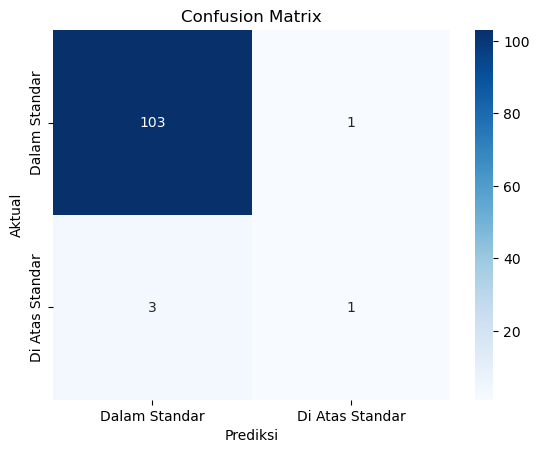

In [29]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders['status'].classes_, yticklabels=label_encoders['status'].classes_)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix")
plt.show()

### Pendekatan klasifikasi
Pendekatan klasifikasi digunakan karena tujuan utama adalah untuk mengelompokkan data menjadi dua kategori: 'Di Atas Standar' dan 'Dalam Standar'.
Metode ini cocok ketika variabel target bersifat kategoris dan tidak memerlukan prediksi nilai numerik yang spesifik.

### Pendekatan regresi
Pendekatan regresi dapat digunakan jika tujuan adalah untuk memprediksi nilai numerik ('nilai') secara spesifik. Setelah prediksi nilai, dapat dibandingkan dengan 'baku_mutu' untuk menentukan apakah berada di atas atau dalam standar."
Namun, regresi memerlukan langkah tambahan dan biasanya lebih kompleks jika fokus utama hanya pada klasifikasi kategori.



### Visualisasi nilai vs baku_mutu dengan status

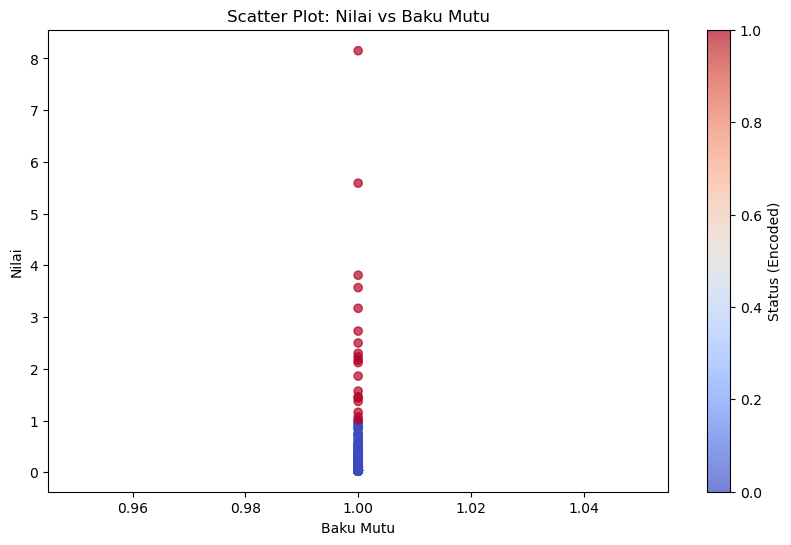

Scatter Plot memvisualisasikan hubungan antara 'nilai' dan 'baku_mutu'.
Titik di atas garis y=x (di mana nilai > baku_mutu) dikategorikan sebagai 'Di Atas Standar',
sedangkan titik di bawah dikategorikan sebagai 'Dalam Standar'.


In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(data_besi['baku_mutu'], data_besi['nilai'], c=data_besi['status'], cmap='coolwarm', alpha=0.7)
plt.colorbar(label='Status (Encoded)')
plt.xlabel("Baku Mutu")
plt.ylabel("Nilai")
plt.title("Scatter Plot: Nilai vs Baku Mutu")
plt.show()

print("Scatter Plot memvisualisasikan hubungan antara 'nilai' dan 'baku_mutu'.")
print("Titik di atas garis y=x (di mana nilai > baku_mutu) dikategorikan sebagai 'Di Atas Standar',")
print("sedangkan titik di bawah dikategorikan sebagai 'Dalam Standar'.")